# Data Analysis of Google Apps Rating

### importing the required module

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df = pd.read_csv("C:/Users/hp/Downloads/googleplaystore.csv/googleplaystore.csv")

In [7]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
df.shape

(10841, 13)

#### This Dataset contains 10841 Rows and 13 Coloumns

In [12]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Data Cleaning

### Counting the number of missing values in the Dataframe

In [16]:
df.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


##### As we are seeing there are some 'True' value in the last of the dataset. It means dataset contains null value.


In [17]:
# count the number of missing value in each column
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#### In the dataset, Rating column have 1474, Type have 1, Content rating have 1, Current ver have 8 and Android ver have 3 missing values.

### Checking how many ratings are more than 5 - Outliers


In [19]:
df[df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [20]:
df.drop([10472],inplace = True)

In [21]:
df[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


<AxesSubplot:>

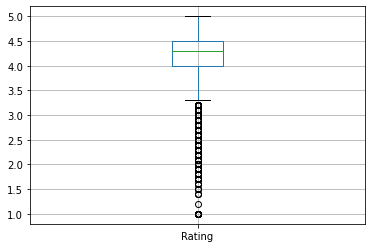

In [22]:
df.boxplot()

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

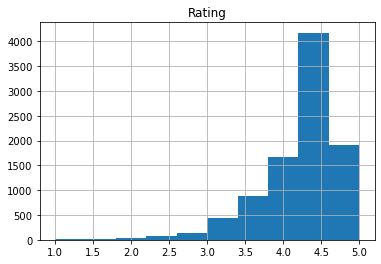

In [23]:
df.hist()

### Data Manipulation and Imputation

##### Filling the null values with appropriate values using aggregate functions such as mean median and mode

In [24]:
# Define a function impute_median

def impute_median(series):
    return series.fillna(series.median())

In [25]:
df.Rating = df['Rating'].transform(impute_median)

In [26]:
# count the number of missing values in each column
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [28]:
# modes of catagorical values
print(df['Type'].mode())
print(df['Current Ver'].mode())
print(df['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [30]:
# Fill the missing catagorical values with mode
df['Type'].fillna(str(df['Type'].mode().values[0]),inplace = True)
df['Current Ver'].fillna(str(df['Current Ver'].mode().values[0]),inplace = True)
df['Android Ver'].fillna(str(df['Android Ver'].mode().values[0]),inplace = True)

In [31]:
# count the number of missing values in each column
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [32]:
### convert Price, Reviews and installs into numerical values
df['Price'] = df['Price'].apply(lambda x : str(x).replace('$','') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x :float(x))
df['Reviews'] = pd.to_numeric(df['Reviews'], errors = 'coerce')

In [33]:
df['Installs'] = df['Installs'].apply(lambda x : str(x).replace('+', '') if '+' in str(x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x : str(x).replace(',', '') if ',' in str(x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x : float(x))

In [34]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,50000.0,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1000000.0,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000.0,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,10000.0,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [35]:
# summary stats after cleaning
df.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [39]:
grp = df.groupby('Category')
grp.sum()

,Rating,Reviews,Installs,Price
Category,,,,
ART_AND_DESIGN,283.1,1714440,1.243381e+08,5.97
AUTO_AND_VEHICLES,357.5,1163666,5.313021e+07,13.47
BEAUTY,227.0,396240,2.719705e+07,0.00
BOOKS_AND_REFERENCE,1001.5,21959069,1.921470e+09,119.77
BUSINESS,1923.9,13954552,1.001915e+09,185.27
COMICS,249.6,3383276,5.608615e+07,0.00
COMMUNICATION,1617.7,815462260,3.264728e+10,83.14
DATING,942.0,7291278,2.643108e+08,31.43
EDUCATION,684.6,39595786,8.714520e+08,17.96


## Data Visualization


In [43]:
x = grp['Rating'].agg(np.mean)
y = grp['Price'].agg(np.sum)
z = grp['Reviews'].agg(np.mean)
print(x)
print(y)
print(z)

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

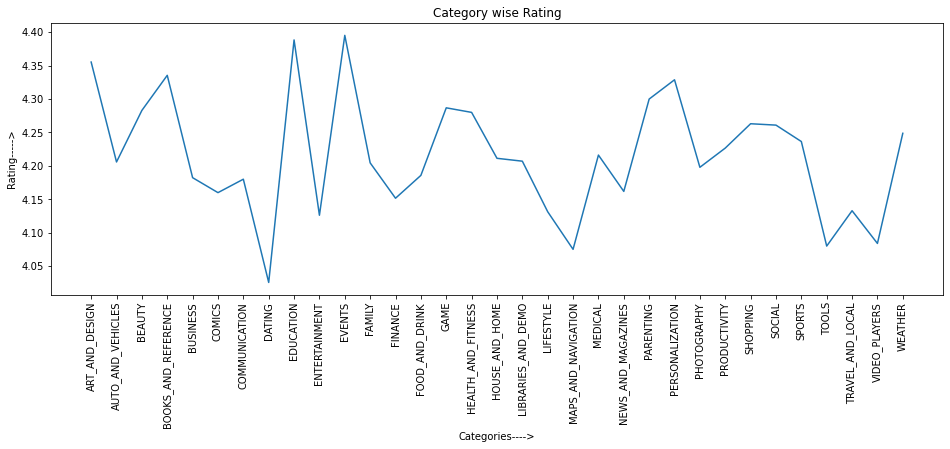

In [54]:
plt.figure(figsize=(16,5))
plt.plot(x)
plt.xticks(rotation = 90)
plt.title("Category wise Rating")
plt.xlabel("Categories---->")
plt.ylabel("Rating----->")
plt.show()

#### It is quite apparent that people hold high expectations when it comes to dating and navigation thus these two categories are lowest rated while education and events are low expectation category thus there rating is relatively higher.

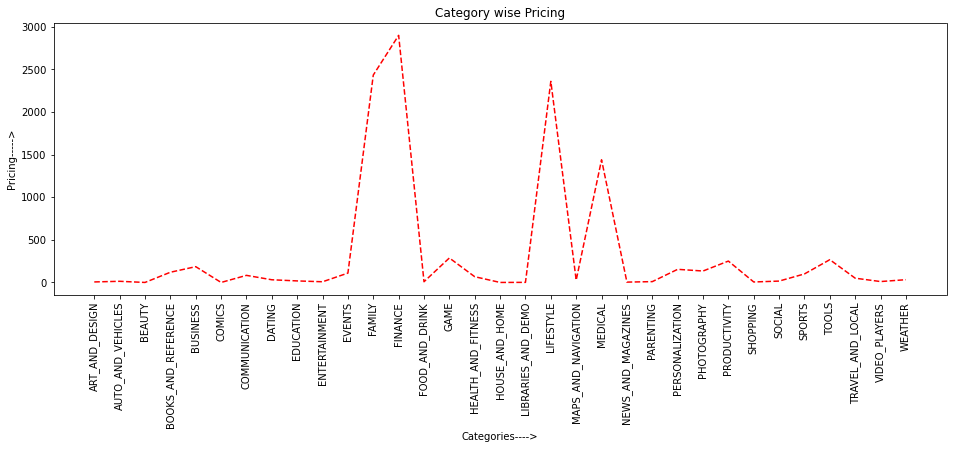

In [55]:
plt.figure(figsize=(16,5))
plt.plot(y,'r--')
plt.xticks(rotation = 90)
plt.title("Category wise Pricing")
plt.xlabel("Categories---->")
plt.ylabel("Pricing----->")
plt.show()

#### Finance, Life Style and Medical are high value markets which is clearly evident in the above dataset as their average price are higher than the base line.


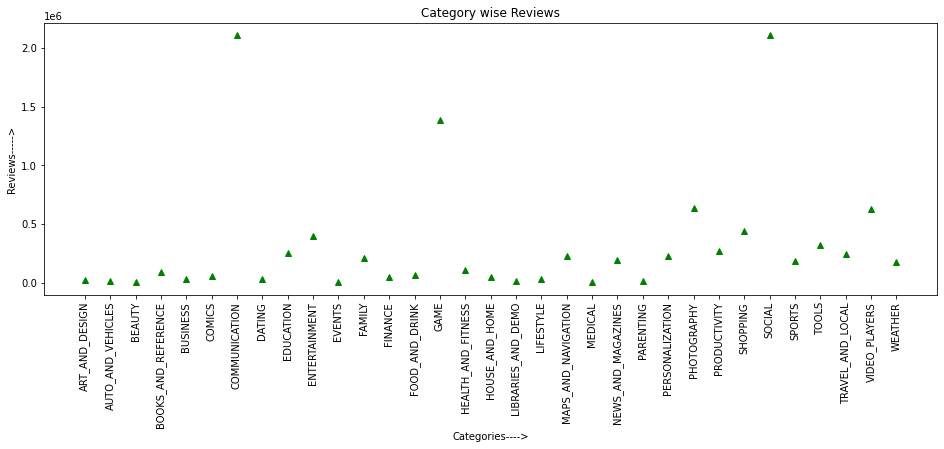

In [59]:
plt.figure(figsize=(16,5))
plt.plot(z,'g^')
plt.xticks(rotation = 90)
plt.title("Category wise Reviews")
plt.xlabel("Categories---->")
plt.ylabel("Reviews----->")
plt.show()

#### The most abundant of all category of Apps are Communication, Social and Games if you were to pick an app at random then it is highly probable that it will be from these three categories thus they have recieved higher Reviews.